In [57]:
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import os

### Pacejka Magic Formula

In [58]:
# def long_fit(data, b0, b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11, b12, b13, IA_coeff_mult, IA_coeff_shift):
#     FZ = data[0] / 1000 * -1
#     SR = data[1]
#     IA = data[2]

#     C = b0
#     D = FZ * (b1 * FZ + b2)
    
#     BCD = (b3 * FZ**2 + b4 * FZ) * np.exp(-1 * b5 * FZ)
#     B = BCD / (C * D)
#     H = b9 * FZ + b10

#     E = (b6 * FZ**2 + b7 * FZ + b8) * (1 - b13 * np.sign(SR + H))

#     V = b11 * FZ + b12
#     Bx1 = B * (SR + H)

#     return (D * np.sin(C * np.arctan(Bx1 - E * (Bx1 - np.arctan(Bx1)))) + V) * (IA * IA_coeff_mult + IA_coeff_shift)

def long_fit(data, b0, b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11, b12, b13):
    FZ = data[0] / 1000 * -1
    SR = data[1]

    C = b0
    D = FZ * (b1 * FZ + b2)
    
    BCD = (b3 * FZ**2 + b4 * FZ) * np.exp(-1 * b5 * FZ)
    B = BCD / (C * D)
    H = b9 * FZ + b10

    E = (b6 * FZ**2 + b7 * FZ + b8) * (1 - b13 * np.sign(SR + H))

    V = b11 * FZ + b12
    Bx1 = B * (SR + H)

    return (D * np.sin(C * np.arctan(Bx1 - E * (Bx1 - np.arctan(Bx1)))) + V)

### Desired Parameters for Filtering

In [59]:
tires = {"braking_hoosier_r25b_16x7-5_10x7":{"long":None, "lat":None}}

camber = 0 # default camber
pressure = 12 * 6.89476 # default pressure
velocity = 25 * 1.60934 # default velocity
slip_angle = 0
run_num = 1

### Import and Filter Tire Data

In [80]:
for name, tire in tires.items():
    try:
        os.chdir("C:/Users/rober/Documents/GitHub/tire_analysis/processing/results")
        print(os.getcwd())
        df = pd.read_csv(f"../../../tire_analysis/processing/results/{name}.csv")
        tire["long"] = df[(df["pressure"] == pressure) & (df["velocity"] == velocity)]
        print(tire["long"])
        
    except:
        print("Error getting long data for {0}".format(name))

    # try:
    #     df = pd.read_csv(f"../tire_data/processed_data/cornering_{name}.csv")
    #     tire["lat"] = df[(df["velocity"] == velocity) & (df["pressure"] == pressure)]
    #     # print(tire["lat"])

    # except:
    #     print("Error getting lateral data for {0}".format(name))

C:\Users\rober\Documents\GitHub\tire_analysis\processing\results
     Unnamed: 0        SL           FX         load  velocity  pressure  \
0             0 -0.142818 -3113.070000 -1112.055122   40.2335  82.73712   
1             0 -0.137050 -3112.520333 -1112.055122   40.2335  82.73712   
2             0 -0.131282 -3130.071194 -1112.055122   40.2335  82.73712   
3             0 -0.125514 -3072.477407 -1112.055122   40.2335  82.73712   
4             0 -0.119746 -3038.880469 -1112.055122   40.2335  82.73712   
..          ...       ...          ...          ...       ...       ...   
245           0  0.114923          NaN  -444.822049   40.2335  82.73712   
246           0  0.120634          NaN  -444.822049   40.2335  82.73712   
247           0  0.126344          NaN  -444.822049   40.2335  82.73712   
248           0  0.132055          NaN  -444.822049   40.2335  82.73712   
249           0  0.137766          NaN  -444.822049   40.2335  82.73712   

     camber  slip       NFX  
0   

### Define Coefficients

In [61]:
# df = tires["hoosier_r25b_16x7-5_10x7"]["long"]
x_lst = [x for x in df["load"].tolist()]
# y_lst = [x * 100 for x in df["SL"].tolist()]
# z_lst = df["FX"].tolist()

# optimal = [2.4299544011118486, 192.6439205435163, 3004.4868352663448, -401.46670130280563, 702.5750678614955, -0.1860057989059407, 3.842257055358237, -0.1704186126594227, -3.1689361773408438, -1.4021441268634667, 1.009248943160487, 0.7748110187699014, 0.5893057407163083, 0.2779580699825117, 1000, 1000]
optimal = [0.46024966176377113, 4000.509873697152, 1097.1712081460967, 202.18848632159495, 100.8812198037175, -0.2557010431649166, 0.3066955241461764, 0.011822770671297778, -1.9521015799737094, 0, 0, 0, 0, 0]

### Plotting

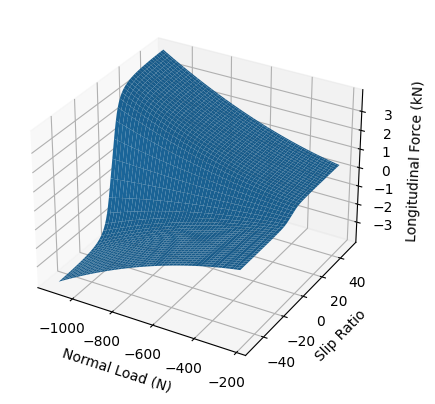

In [62]:
model_x_data = np.linspace(min(x_lst), max(x_lst), 1000)
model_y_data = np.linspace(-50, 50, 100)

X, Y = np.meshgrid(model_x_data, model_y_data)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)

W1 = long_fit([X, Y], *optimal) / 1000

# W2 = long_fit([X, Y, 1], *optimal) / 1000

# W3 = long_fit([X, Y, 2], *optimal) / 1000

ax = plt.axes(projection='3d')

fig.add_axes(ax)
ax.plot_surface(X, Y, W1)

ax.set_xlabel('Normal Load (N)')
ax.set_ylabel('Slip Ratio')
ax.set_zlabel('Longitudinal Force (kN)')

plt.show()

In [81]:
front = long_fit([259.6 / 0.224809, 100], *optimal) * 0.224809
print(f"Front: {front}")
rear = long_fit([60.4 / 0.224809, 100], *optimal) * 0.224809
print(f"Rear: {rear}")

Front: 581.0843398675652
Rear: -0.8925178921158676


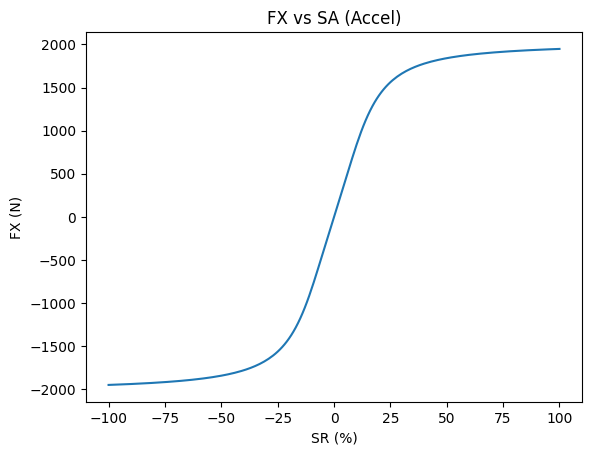

In [92]:
normal_force = 230 / 0.224809
SR_vals = [x for x in range(-100, 101)]
points = [(x, long_fit([normal_force, x], *optimal)) for x in SR_vals]
plt.title("FX vs SA (Accel)")
plt.ylabel("FX (N)")
plt.xlabel("SR (%)")
plt.plot([x[0] for x in points], [y[1] for y in points])

In [ ]:
normal_force = 276.12852459 / 0.224809
SR_vals = [x for x in range(-100, 101)]
points = [(x, long_fit([normal_force, x], *optimal)) for x in SR_vals]
plt.title("FX vs SA Under Max Braking")
plt.ylabel("FX (N)")
plt.xlabel("SR (%)")
plt.plot([x[0] for x in points], [y[1] for y in points])

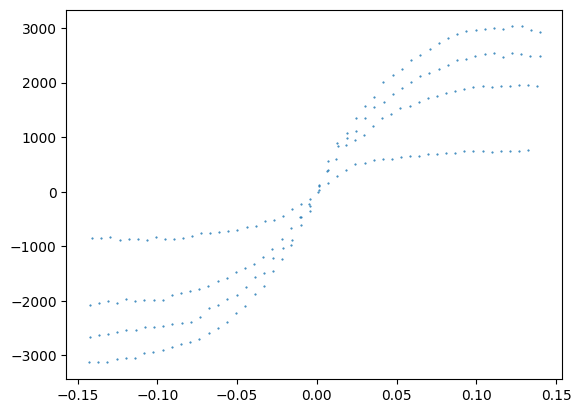

In [79]:
for name, tire in tires.items():
    # temp = tire["lat"][tire["lat"]["load"]]

    x_lst = tire["long"]["SL"].tolist()
    y_lst = tire["long"]["FX"].tolist()

    plt.scatter(x_lst, y_lst, s=0.25)